In [1]:
!pip install pandasai langchain openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 907.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.3/794.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

# Self-Service Analytics with [OpenAI](https://platform.openai.com/docs/quickstart?context=python), Python, and [Pandas-AI](https://docs.pandas-ai.com/en/latest/)

## Introduction

Welcome to this interactive Jupyter Notebook designed to showcase the integration of OpenAI, Python, and Pandas for self-service analytics. This notebook is intended for anyone interested in leveraging the power of natural language processing (NLP) to interact with tabular data. Whether you are a data scientist, a business analyst, or just curious about the intersection of AI and data analytics, this notebook will provide you with practical insights and hands-on experience.

### What You Will Learn

In this notebook, you will learn how to:

- **Utilize OpenAI's capabilities**: Understand how OpenAI's language models can be employed to interpret and process natural language queries.
- **Work with Python and Pandas-AI**: Explore how Python and its powerful data manipulation library, Pandas, can be used to handle and analyze tabular data.
- **Create Interactive Queries**: Learn how to develop a system where users can input natural language queries and receive responses in various formats including text, tables, and charts.
- **Visualize Data**: Discover how to present data analytics results in a visually appealing and informative manner.

### Applications

This approach to self-service analytics has a wide range of applications, including:

- **Business Intelligence**: Empowering business users to gather insights without needing deep technical know-how in data science.
- **Educational Tools**: Providing a more accessible way for students to interact with and learn from data.
- **Data Journalism**: Enabling journalists to explore and report on complex data sets through simple queries.

In this example, we use `csv` files as data source, but in a real world, we are also able to use SQL, data warehouse, and other multiple data sources supported by pandas.

### Prerequisites

A basic understanding of Python programming and familiarity with Pandas will be beneficial for following along with this notebook. However, detailed explanations will be provided for each step to make this tutorial accessible even for beginners.

### Let's Get Started!

Join us on this journey to explore how the fusion of AI and data analytics can transform the way we interact with data. Let your curiosity lead the way as we delve into the world of self-service analytics powered by OpenAI, Python, and Pandas.


### Datasets

this data is perfectly curated to perform sales analysis. We have an e-commerce sales dataset from India with 3 csv files -List of Orders, Order details, Sales target

What's inside?
* **List of Orders** - This dataset contains purchase information. The information includes ID, Date of Purchase and customer details

* **Order Details** - This dataset contains order ID, with the order price, quantity,profit, category and subcategory of product

* **Sales Target** -This dataset contains sales target amount and date for each product category

Find the datasets [here](https://www.kaggle.com/datasets/benroshan/ecommerce-data/data)

In [2]:
# activate google drive to import datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import userdata
key = userdata.get('openai_key')

In [4]:
import pandas as pd
from pandasai.llm import OpenAI
from pandasai import SmartDataframe, SmartDatalake
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [5]:
# enter your own API Key here
llm = OpenAI(api_token=key)

## 1. SmartDataframe

A SmartDataframe is a pandas (or polars) dataframe that inherits all the properties and methods from the pd.DataFrame, but also adds conversational features to it.

In [6]:
# read example data
df_order = pd.read_csv('/content/drive/MyDrive/Notebook/Dataverse/datasets/Order Details.csv')

In [7]:
# show first 5 rows
df_order.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [8]:
sdf = SmartDataframe(df_order, config={"llm": llm})

#### Query pandas dataframe using natural language

Example 1

Find Top 5 Product Sub-Categories By Amount

In [9]:
# using native pandas
df_order.groupby('Sub-Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(5)

,Sub-Category,Amount
9,Printers,58252.0
1,Bookcases,56861.0
10,Saree,53511.0
8,Phones,46119.0
3,Electronic Games,39168.0


In [10]:
# query in natural language
sdf.chat("Return the top 5 product sub-categories by total amount")

,Sub-Category,Amount
0,Printers,58252.0
1,Bookcases,56861.0
2,Saree,53511.0
3,Phones,46119.0
4,Electronic Games,39168.0


Example 2

Sum The Profit

In [11]:
# using native pandas
df_order['Profit'].sum()

23955.0

In [12]:
# query in natural language
sdf.chat("What is the total profit")

23955.0

Example 3

Plotting A Bar Chart

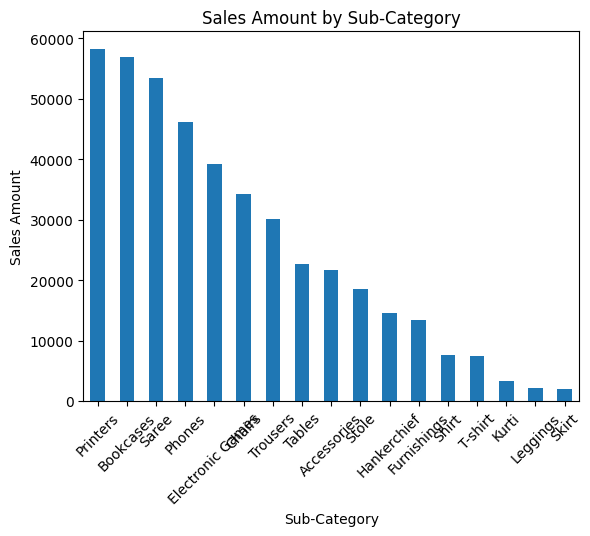

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/smart_datalake_chat/code_execution.py", line 46, in execute
    result = pipeline_context.query_exec_tracker.execute_func(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 134, in execute_func
    step_data = self._generate_exec_step(tag, result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 183, in _generate_exec_step
    self._response = self._format_response(result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 202, in _format_response
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
. Retrying


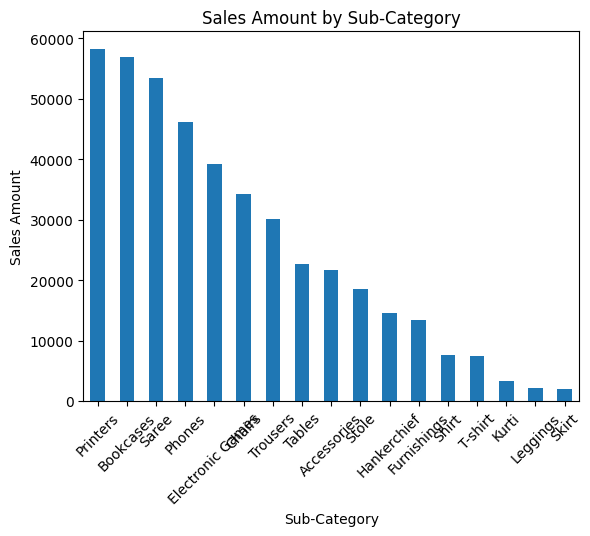

'/content/exports/charts/temp_chart.png'

In [13]:
# using query language
sdf.chat("Plot a chart of the sales amount by sub-category. Sort from highest to lowest")

Example 4

Plotting A Pie Chart

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/smart_datalake_chat/code_execution.py", line 46, in execute
    result = pipeline_context.query_exec_tracker.execute_func(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 134, in execute_func
    step_data = self._generate_exec_step(tag, result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 183, in _generate_exec_step
    self._response = self._format_response(result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 202, in _format_response
    with open(result["value"], "rb") as image_file:
TypeError: expected str, bytes or os.PathLike object, not module
. Retrying


'/content/exports/charts/temp_chart.png'

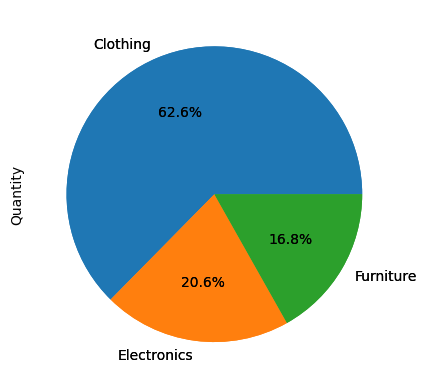

In [14]:
# using query language
sdf.chat("Plot a pie chart of the product category by total quantity")

## 2. SmartDatalake

Sometimes, we might want to work with multiple dataframes at a time, letting the LLM orchestrate which one(s) to use to answer your queries. In such cases, instead of using a `SmartDataframe` we should rather use a `SmartDatalake`.

The concept is very similar to the `SmartDataframe`, but instead of accepting only 1 `df` as input, it can accept multiple ones.

In [15]:
# add more dataframes
df_list =  pd.read_csv('/content/drive/MyDrive/Notebook/Dataverse/datasets/List of Orders.csv')
df_target = pd.read_csv('/content/drive/MyDrive/Notebook/Dataverse/datasets/Sales target.csv')

In [16]:
# show first 5 rows
df_list.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [17]:
# change date type
df_list['Order Date'] = pd.to_datetime(df_list['Order Date'], format='%d-%m-%Y')

In [18]:
# show first 5 rows
df_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [19]:
# create lake (joining all dataframes)
lake = SmartDatalake(
    [df_order, df_list, df_target],
    config={"llm": llm}
)

Example 1


Customer Name who bought most




In [20]:
# using native pandas
pd.merge(
    df_order,
    df_list,
    how='left',
    left_on='Order ID',
    right_on='Order ID'
).groupby('CustomerName')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(1)

,CustomerName,Amount
328,Yaanvi,9177.0


In [21]:
# using natural language
lake.chat("Who is customer name buying the most amount?")

'The customer buying the most amount is Yaanvi.'

Example 2

Category achieving target

In [22]:
# using native pandas
pd.merge(
    df_order.groupby('Category')['Amount'].sum().reset_index(),
    df_target.groupby('Category')['Target'].sum().reset_index(),
    how='left',
    on='Category'
)

,Category,Amount,Target
0,Clothing,139054.0,174000.0
1,Electronics,165267.0,129000.0
2,Furniture,127181.0,132900.0


In [51]:
# using natural language
lake.chat("sum of amount and sum of target. Groupby category")

,Sum of Amount,Sum of Target
Category,,
Clothing,139054.0,174000.0
Electronics,165267.0,129000.0
Furniture,127181.0,132900.0


## Examples: 50 Queries to ask
**Simple Queries**
1. Who ... most?
2. How many rows ...?
3. How many ... are from .... and have been ...?
4. Total for .....
5. How many ... from ....?
6. Create a pie chart for ...
7. Create a bar chart for ...
8. Plot a line chart ....
9. Calculate the sum for ....
10. Calculate the average for ...
11. Create a box plot to ....
12. How many ... has ...?
13. What is the .... in .....?
14. "Plot the histogram of .... showing for each the...," " using different colors for each bar"
15. Plot the ... against ...
16. Return .... with count of distinct ....

**Complex Queries**

* `Data Exploration`:

1. Who has the most frequent purchase in the dataset?
2. How many rows contain missing values in the "age" column?
3. How many employees are from the marketing department and have been with the company for more than 5 years?
4. What is the total revenue generated by each product category?
5. How many customers live in each city?

* `Trend Analysis`:

1. Create a pie chart showing the distribution of customer sentiment scores.
2. Plot a bar chart comparing sales figures across different quarters.
3. Generate a line chart to visualize website traffic trends over the past month.
4. Calculate the sum of monthly expenses for each department.
5. Determine the average rating for each movie genre.

* `Advanced Insights`:

1. Create a box plot to compare income levels across different age groups.
2. How many unique product IDs appear in each customer's order history?
3. What is the average price of flights departing from each airport?
4. Plot the histogram of exam scores, highlighting the percentage of students within each grade range.
5. Visualize the correlation between temperature and ice cream sales.
6. Return the top 10 most popular products along with their distinct order count.

* `Custom Analysis`:

1. Identify customers who spent more than $1000 in the last quarter and live within a 10-mile radius of our store.
2. Find blog posts with the highest average engagement within the past year.
3. Group employees by department and calculate the average salary for each group.
4. Plot the distribution of house prices in different neighborhoods using a scatter plot.
5. Predict the likelihood of customer churn based on past purchase behavior.

* `Natural Language Queries`:

1. Which city has the most active social media users?
2. Are there any trends in customer complaints received over time?
3. How does website traffic differ between mobile and desktop users?
4. Tell me about the performance of our marketing campaigns across different channels.
5. Can you identify any potential outliers in the sales data?

* `Combining AI and Analytics`:

1. Summarize the key insights from this customer survey dataset.
2. Generate a text report describing the factors contributing to high employee turnover.
3. Predict the potential sales figures for next quarter based on historical data.
4. Recommend similar products to customers based on their past purchases.
Identify potential fraudulent transactions using anomaly detection algorithms.


**Note**

_All queries support Bahasa as well_

## Query in Bahasa Indonesia

In [26]:
# using native pandas
df_order.loc[
    df_order['Category'] == 'Clothing'
]['Amount'].sum()

139054.0

In [24]:
# using query language
sdf.chat("Berapa total amount dari kategori baju?")

139054.0

In [46]:
sdf.chat("berikan 5 sub kategori product yang terbesar berdasarkan nominal dan angkanya")

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/smart_datalake_chat/code_execution.py", line 46, in execute
    result = pipeline_context.query_exec_tracker.execute_func(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 134, in execute_func
    step_data = self._generate_exec_step(tag, result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 183, in _generate_exec_step
    self._response = self._format_response(result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 198, in _format_response
    df_dict = self.convert_dataframe_to_dict(result["value"])
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 93, in convert_dataframe_to_dict
    return {"headers": json_data["columns"], "rows": json_data["data"]}
KeyE

,Sub-Category,Amount
0,Printers,58252.0
1,Bookcases,56861.0
2,Saree,53511.0
3,Phones,46119.0
4,Electronic Games,39168.0


'/content/exports/charts/temp_chart.png'

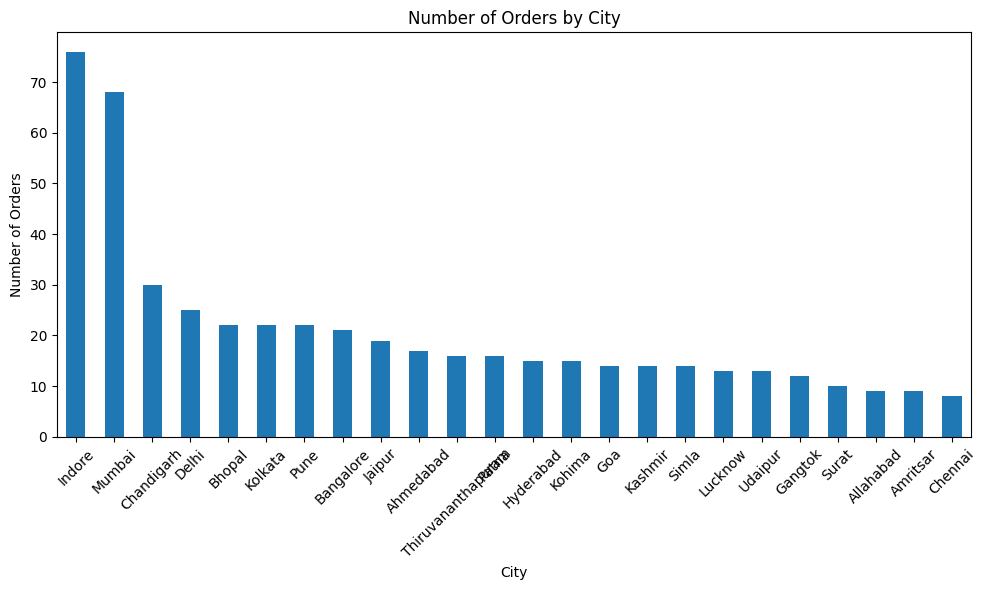

In [67]:
lake.chat("buat grafik batang dari kota mana order berasal. Urutkan dari besar ke kecil")

Example

AI and Analytics

In [52]:
insight = sdf.chat('Summarize the key insights from this order dataset')

In [54]:
print(insight)

The total number of orders is 500.
The total amount is $431,502.00.
The total profit is $23,955.00.
The average quantity per order is 3.74.
The most common category is Clothing.
The most common sub-category is Saree.


In [55]:
sdf.chat("Predict the potential order figures for next quarter based on historical data.")

,Category,Potential Orders
0,Clothing,3516
1,Electronics,1154
2,Furniture,945


## Text to SQL query

To empower the Generative AI model in daily basis, we also can extend the usage in generating SQL query, please refer to [Langchain SQL documentation](https://python.langchain.com/docs/use_cases/qa_structured/sql)

**LangChain** is a framework for developing applications powered by language models. It enables applications that:

* **Are context-aware**: connect a language model to sources of context (prompt instructions, few shot examples, content to ground its response in, etc.)
* **Reason**: rely on a language model to reason (about how to answer based on provided context, what actions to take, etc.)

This framework consists of several parts.

* **LangChain Libraries**: The Python and JavaScript libraries. Contains interfaces and integrations for a myriad of components, a basic run time for combining these components into chains and agents, and off-the-shelf implementations of chains and agents.

* **LangChain Templates**: A collection of easily deployable reference architectures for a wide variety of tasks.

* **LangServe**: A library for deploying LangChain chains as a REST API.

* **LangSmith**: A developer platform that lets you debug, test, evaluate, and monitor chains built on any LLM framework and seamlessly integrates with LangChain.

To find out more about Langchain, please refer to this offical [documentation](https://python.langchain.com/docs/get_started/introduction)

## SQL "JOIN" in Langchain

```
db = SQLDatabase.from_uri(“mssql+pymssql://user1:******@.\SQLEXPRESS/mytestdb”,
include_tables=[‘Contact’,‘Customer’],
sample_rows_in_table_info=0)

llm = OpenAI(temperature=0.0, max_tokens=350)

chain = SQLDatabaseSequentialChain.from_llm(llm, db, verbose=True,top_k = 1)

chain.run(“How many contact records created for customer kevin”)
```

To use "Join" in query, langchain runs under the hood and detects the schema. But keep in mind that use "Large" table is **not recommended**, since it will:
1. Drain the cost
2. Have limited tokens (it means not all rows will be queried)

To save the cost and optimize the performance, we should provide dummy tables containing 10-20 rows on each table, then paste the generated query into our DB

## Example Applications

1. Slack
* [Create a Question Answering bot for Slack on your data](https://medium.com/@e.digiacinto/create-a-question-answering-bot-for-slack-on-your-data-that-you-can-run-locally-a6f43573dfe9)
* [Powering your Slack with LangChain](https://jina.ai/news/langchain-serve-powering-your-slack-with-langchain/)

2. Streamlit
* [Build an LLM app using LangChain](https://docs.streamlit.io/knowledge-base/tutorials/llm-quickstart)

3. FastAPI
* [Create a FastAPI + Langchain Project in 5 Easy Steps](https://medium.com/allient/create-a-fastapi-langchain-project-in-5-easy-steps-a-step-by-step-guide-ab467708fbb)